In [51]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import contextily as cx
import pickle

import IR_processing_utils

from tqdm import tqdm

import scipy.signal

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 7


In [52]:
#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404210937_006_Pleystocen-IR'; flight_height = 160
#data_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404211121_009_Pleystocen-IRb"; flight_height = 160

data_dir = r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404221041_013_Pleystocen-IR4"; flight_height = 400

#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404221002_011_Pleystocen-IR3'; flight_height = 220
#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404221218_016_Pleystocen-IR3b'; flight_height = 220
#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404230843_017_Pleystocen-IR5'; flight_height = 230

#data_dir = r'G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3\DJI_202404231239_024_Pleystocen-IR3'; flight_height = 220

data_subdir = 'tiffs_thermal_parser, emis = 1.00'


sensor_size = [6.144, 7.68] #Mavic sensor size in mm

corr_opts = {'detrend': True, 
             'L2_wnd': 9, 'L2_nsteps': 3,
             'L3_wnd': 9, 'L3_nsteps': 5}

#***************************************************************************************************

if data_subdir is not None:
    data_dir_src = data_dir + '/' + data_subdir + '/'
else:
    data_dir_src = data_dir

display(data_dir_src)

img_array={}

img_array['raw'], img_df = IR_processing_utils.read_IR_images (data_dir_src, n_jobs = 4)

gps_az = np.zeros_like (img_df.gps_lon)
for i in range (0, img_df.shape[0]-1):
    gps_az[i] = IR_processing_utils.calc_compass_bearing ((img_df.gps_lat[i],img_df.gps_lon[i]), (img_df.gps_lat[i+1],img_df.gps_lon[i+1]))
gps_az[-1] = gps_az[-2]
img_df['gps_azimuth'] = gps_az

img_shape = img_array['raw'].shape
img_N = img_df.shape[0]


img_df = IR_processing_utils.init_polygons (img_df, sensor_size, flight_height)

display(img_df.head())

pics_dir = data_dir_src + '/processing_pics/'
if not os.path.isdir (pics_dir):
    os.mkdir (pics_dir)




'G:\\! Data\\IFA\\! campaigns\\202404 Pleistocene Park\\IR_mavic3\\DJI_202404221041_013_Pleystocen-IR4/tiffs_thermal_parser, emis = 1.00/'

read_IR_images(): start reading files


100%|██████████| 910/910 [00:43<00:00, 20.82it/s]


file    gps_lat     gps_lon  Image ImageWidth  \
0  DJI_20240422104604_0001_T.tiff  68.509120  161.512084             640.0   
1  DJI_20240422104608_0002_T.tiff  68.509264  161.512087             640.0   
2  DJI_20240422104612_0003_T.tiff  68.509631  161.512107             640.0   
3  DJI_20240422104615_0004_T.tiff  68.510099  161.512130             640.0   
4  DJI_20240422104619_0005_T.tiff  68.510586  161.512152             640.0   

   Image ImageLength  Image BitsPerSample  Image Compression  \
0              512.0                 32.0                1.0   
1              512.0                 32.0                1.0   
2              512.0                 32.0                1.0   
3              512.0                 32.0                1.0   
4              512.0                 32.0                1.0   

   Image PhotometricInterpretation Image ImageDescription Image Make  ...  \
0                              1.0                IronRed        DJI  ...   
1                              1.0                IronRed        DJI  ...   
2                              1.0                IronRed        DJI  ...   
3                              1.0                IronRed        DJI  ...   
4                              1.0                IronRed        DJI  ...   

  EXIF BodySerialNumber  EXIF LensSpecification  gps_azimuth     min_lon  \
0                   1.0                     9.1     0.386425  161.507957   
1                   1.0                     9.1     1.134926  161.507960   
2                   1.0                     9.1     1.017886  161.507980   
3                   1.0                     9.1     0.975308  161.508002   
4                   1.0                     9.1     1.054236  161.508025   

      max_lon    min_lat    max_lat  delta_lon  delta_lat  \
0  161.516211  68.507910  68.510331   0.008254   0.002421   
1  161.516214  68.508053  68.510474   0.008254   0.002421   
2  161.516234  68.508420  68.510841   0.008254   0.002421   
3  161.516257  68.508889  68.511310   0.008254   0.002421   
4  161.516280  68.509375  68.511796   0.008255   0.002421   

                                             Polygon  
0  POLYGON ((161.51621141156784 68.51033071130746...  
1  POLYGON ((161.51621407652607 68.51047404461958...  
2  POLYGON ((161.5162340048919 68.51084132227409,...  
3  POLYGON ((161.51625681275817 68.5113098222736,...  
4  POLYGON ((161.51627951281804 68.51179637775712...  

[5 rows x 67 columns]

C:\Users\mvar9\AppData\Local\Temp\ipykernel_66500\3090313530.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(*pol.exterior.xy, '-k', color = 'gray')


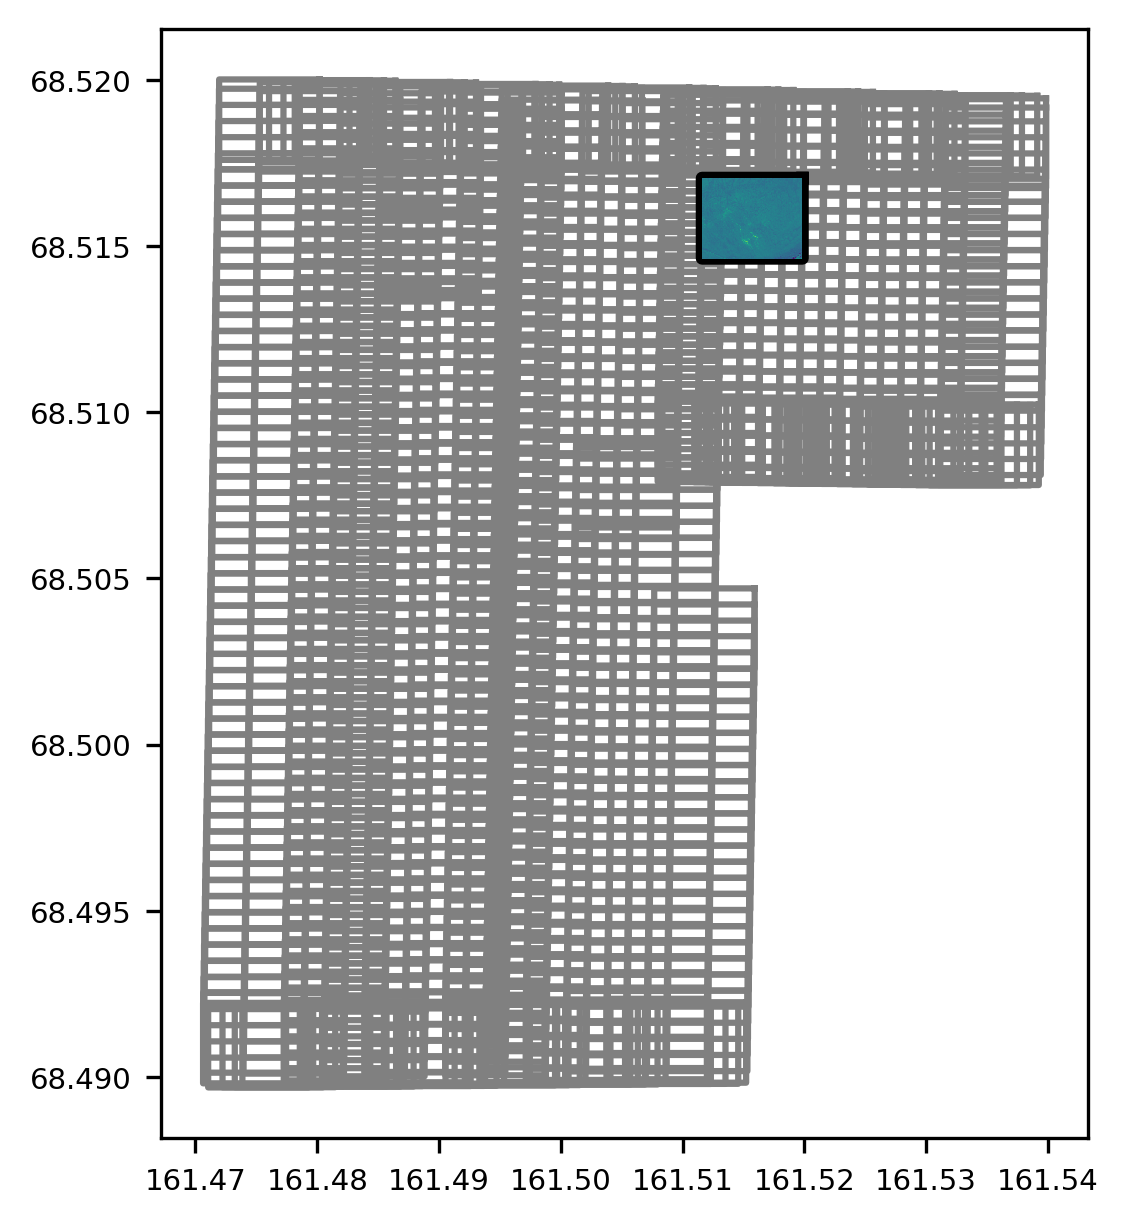

In [53]:
save_dir = pics_dir + '/preview/'
if not os.path.isdir (save_dir):
    os.mkdir (save_dir)

plt.figure()

for i, idx in enumerate(img_df.index):
    if i < 10 or i > 30: continue

    plt.clf()
    for pol in img_df['Polygon']:
        plt.plot(*pol.exterior.xy, '-k', color = 'gray')

    plt_x_lim = plt.xlim()
    plt_y_lim = plt.ylim()

    pol = img_df['Polygon'][idx]

    plt.plot(*pol.exterior.xy, '-k', linewidth = 3)

    x_mesh, y_mesh, _ = IR_processing_utils.create_mesh (img_df['min_lon'][idx], img_df['max_lon'][idx],
                                                         img_df['min_lat'][idx], img_df['max_lat'][idx], img_shape)

    
    plt.pcolormesh (x_mesh, y_mesh, img_array['raw'][:,:,i], zorder = 100) #, alpha=0.5)

    plt.xlim(plt_x_lim)
    plt.ylim(plt_y_lim)
    #cx.add_basemap(plt.gca(), source = cx.providers.Esri.WorldImagery, crs = 4326)            
    plt.gca().set_aspect(1.0/np.cos(np.array(plt.ylim()).mean()*np.pi/180))
    
    plt.savefig(save_dir + str(i)+'.png')
    
    

    

In [54]:
diff_matrix = {}

reload_pkl = False
pkl_path = data_dir_src + '/diff_matrix, h = %d'%flight_height + '.pkl'

if not os.path.isfile (pkl_path):
    reload_pkl = True
if reload_pkl:
    diff_matrix['raw'], diff_weights = IR_processing_utils.calc_diff_matrix (img_array['raw'], img_df)

    with open(pkl_path, 'wb') as handle:
        pickle.dump((diff_matrix['raw'], diff_weights), handle, protocol=pickle.HIGHEST_PROTOCOL) 
else:
    with open(pkl_path, 'rb') as handle:
        diff_matrix['raw'], diff_weights = pickle.load(handle)




100%|██████████| 910/910 [08:13<00:00,  1.84it/s]


'n_outliers = 18, max_diff = 8.070495'

'n_outliers = 15, max_diff = 2.024813'

'n_outliers = 6, max_diff = 0.993827'

'n_outliers = 2, max_diff = 0.827077'

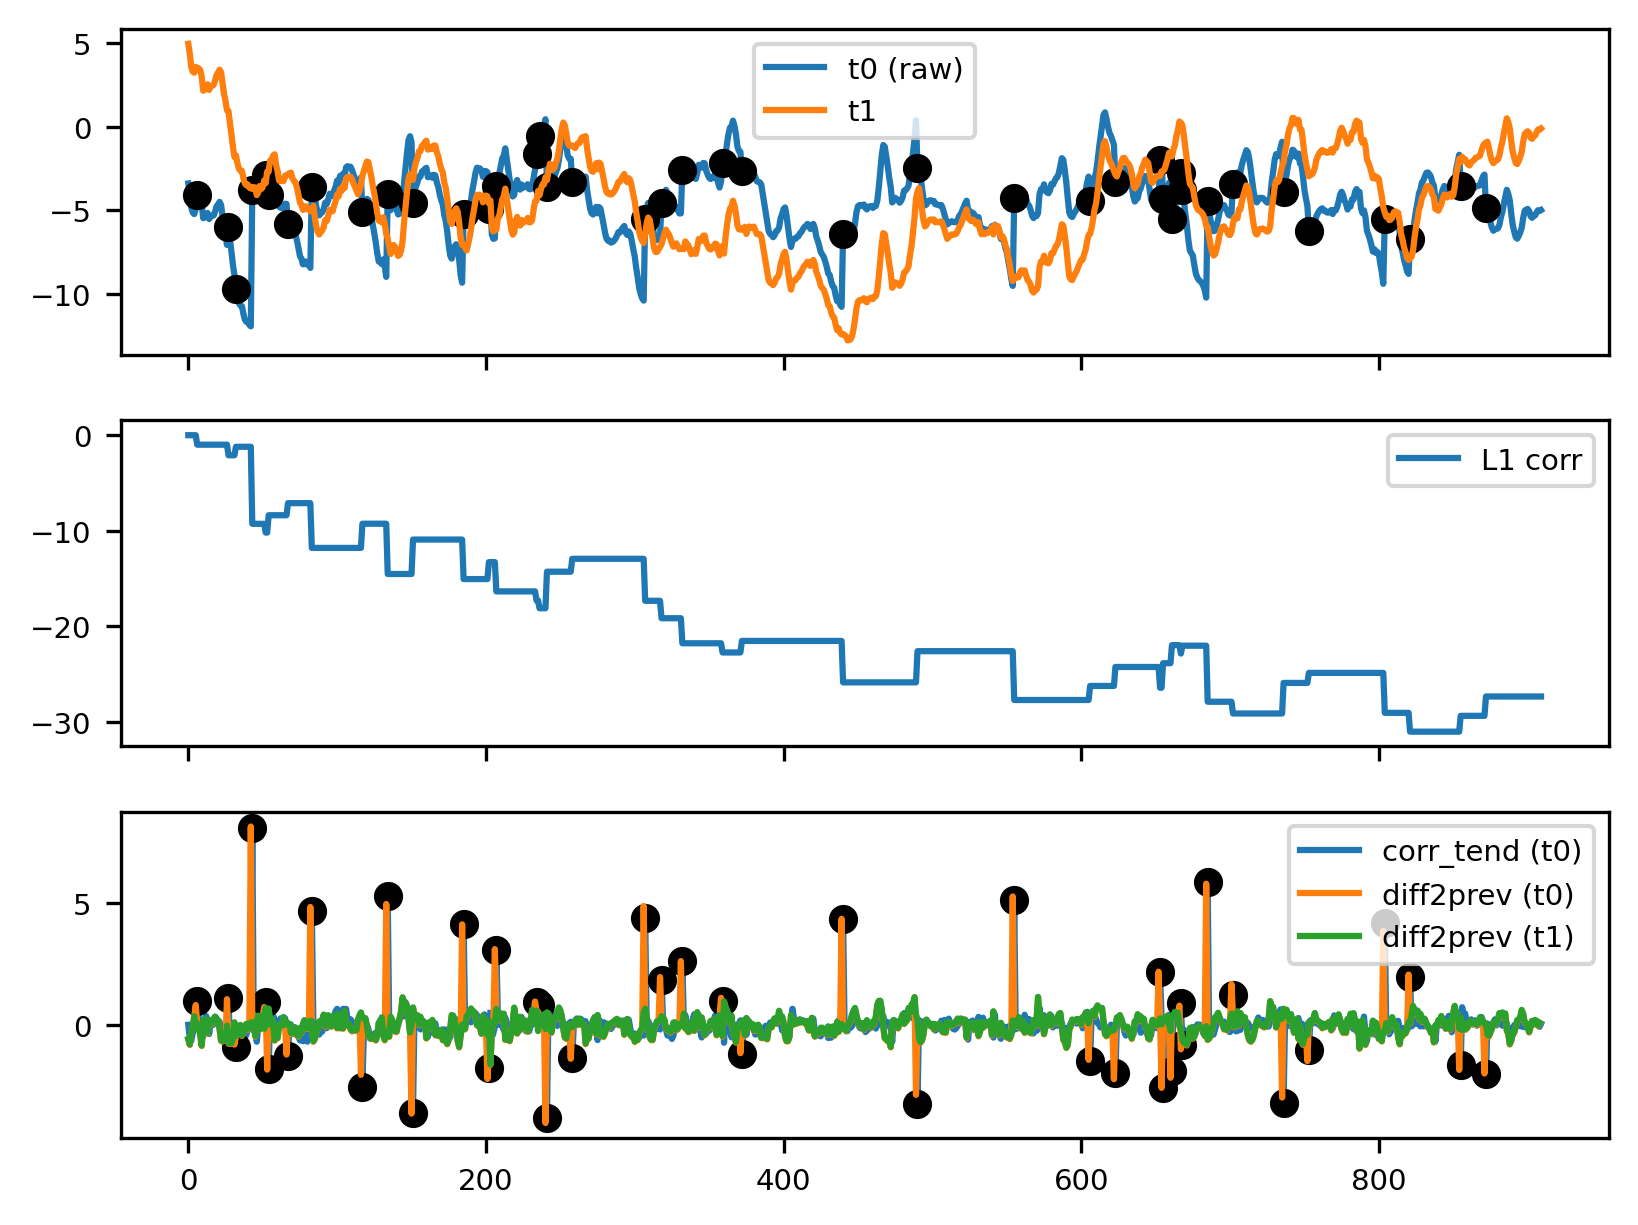

In [55]:
save_dir = pics_dir + '/corr/'
if not os.path.isdir (save_dir):
    os.mkdir (save_dir)


img_array['t1'], diff_matrix['t1'] = IR_processing_utils.run_L1_corr (img_array['raw'], diff_matrix['raw'],
                                                                      corr_opts['detrend'], pics_dir = save_dir)


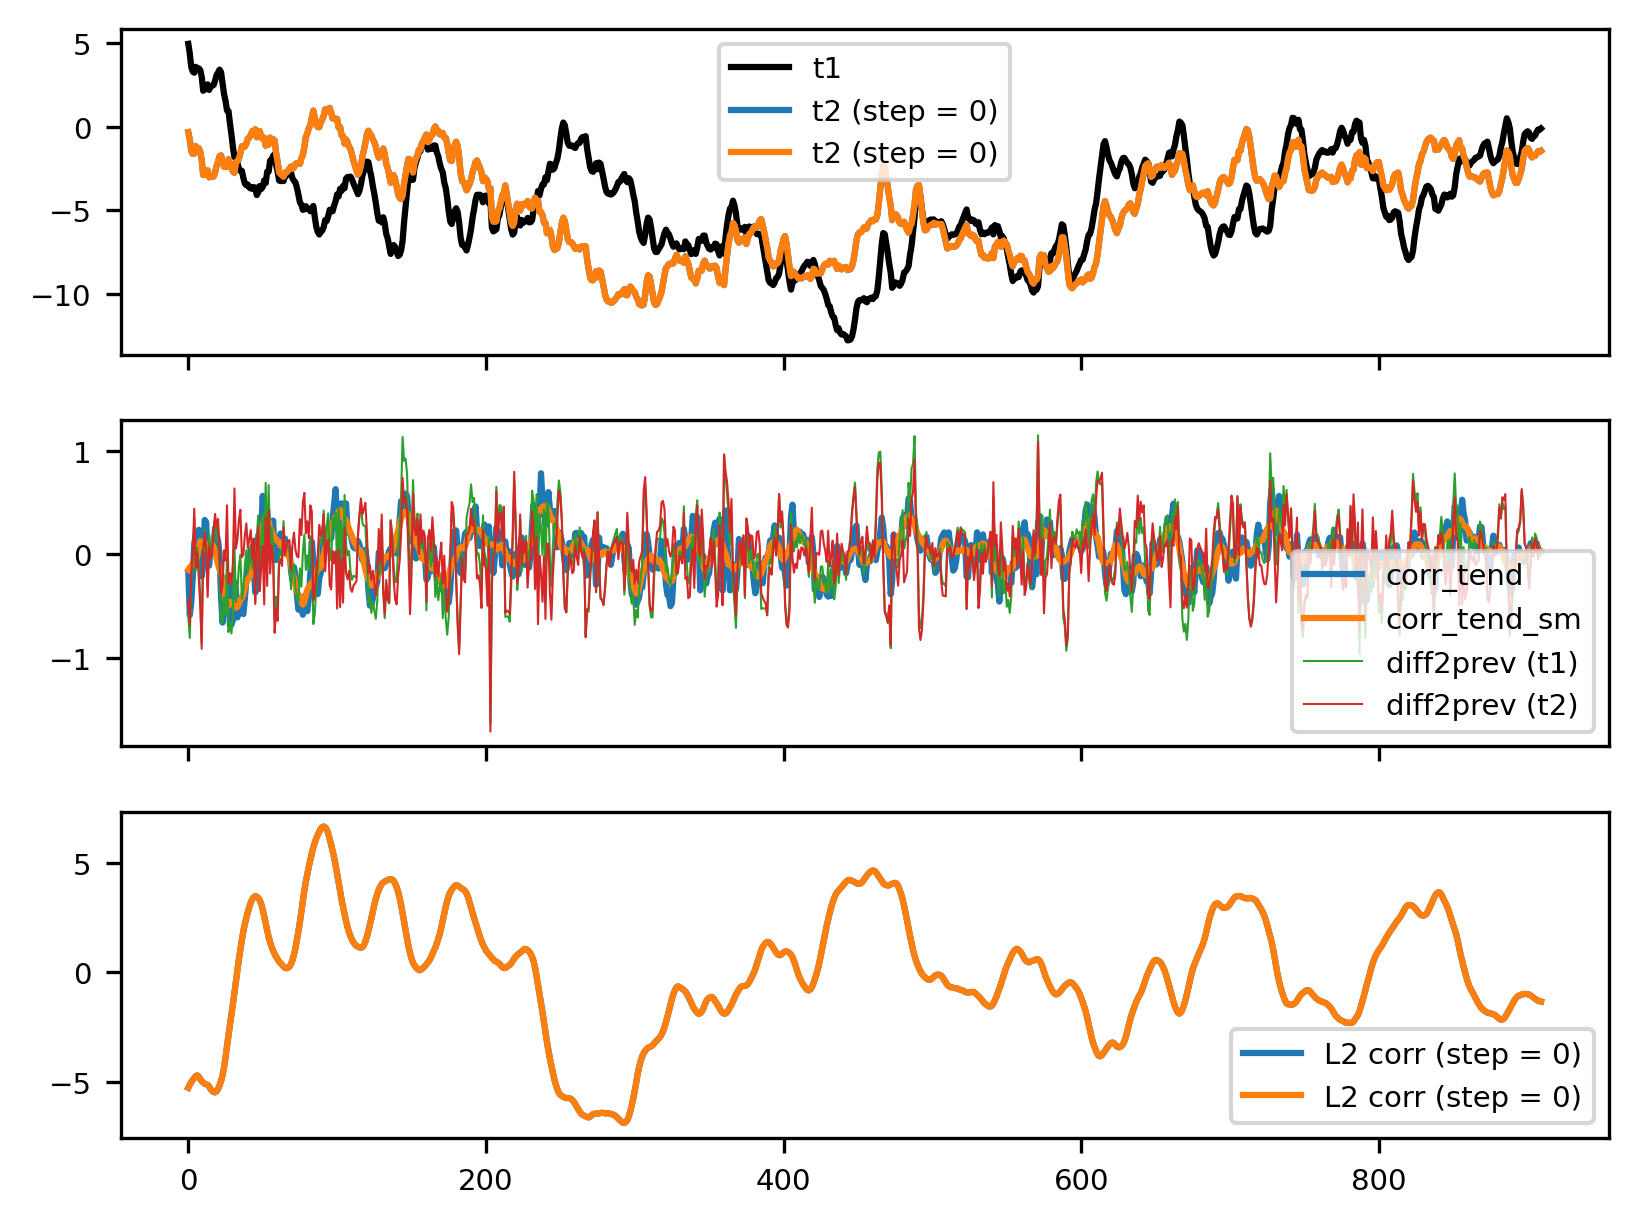

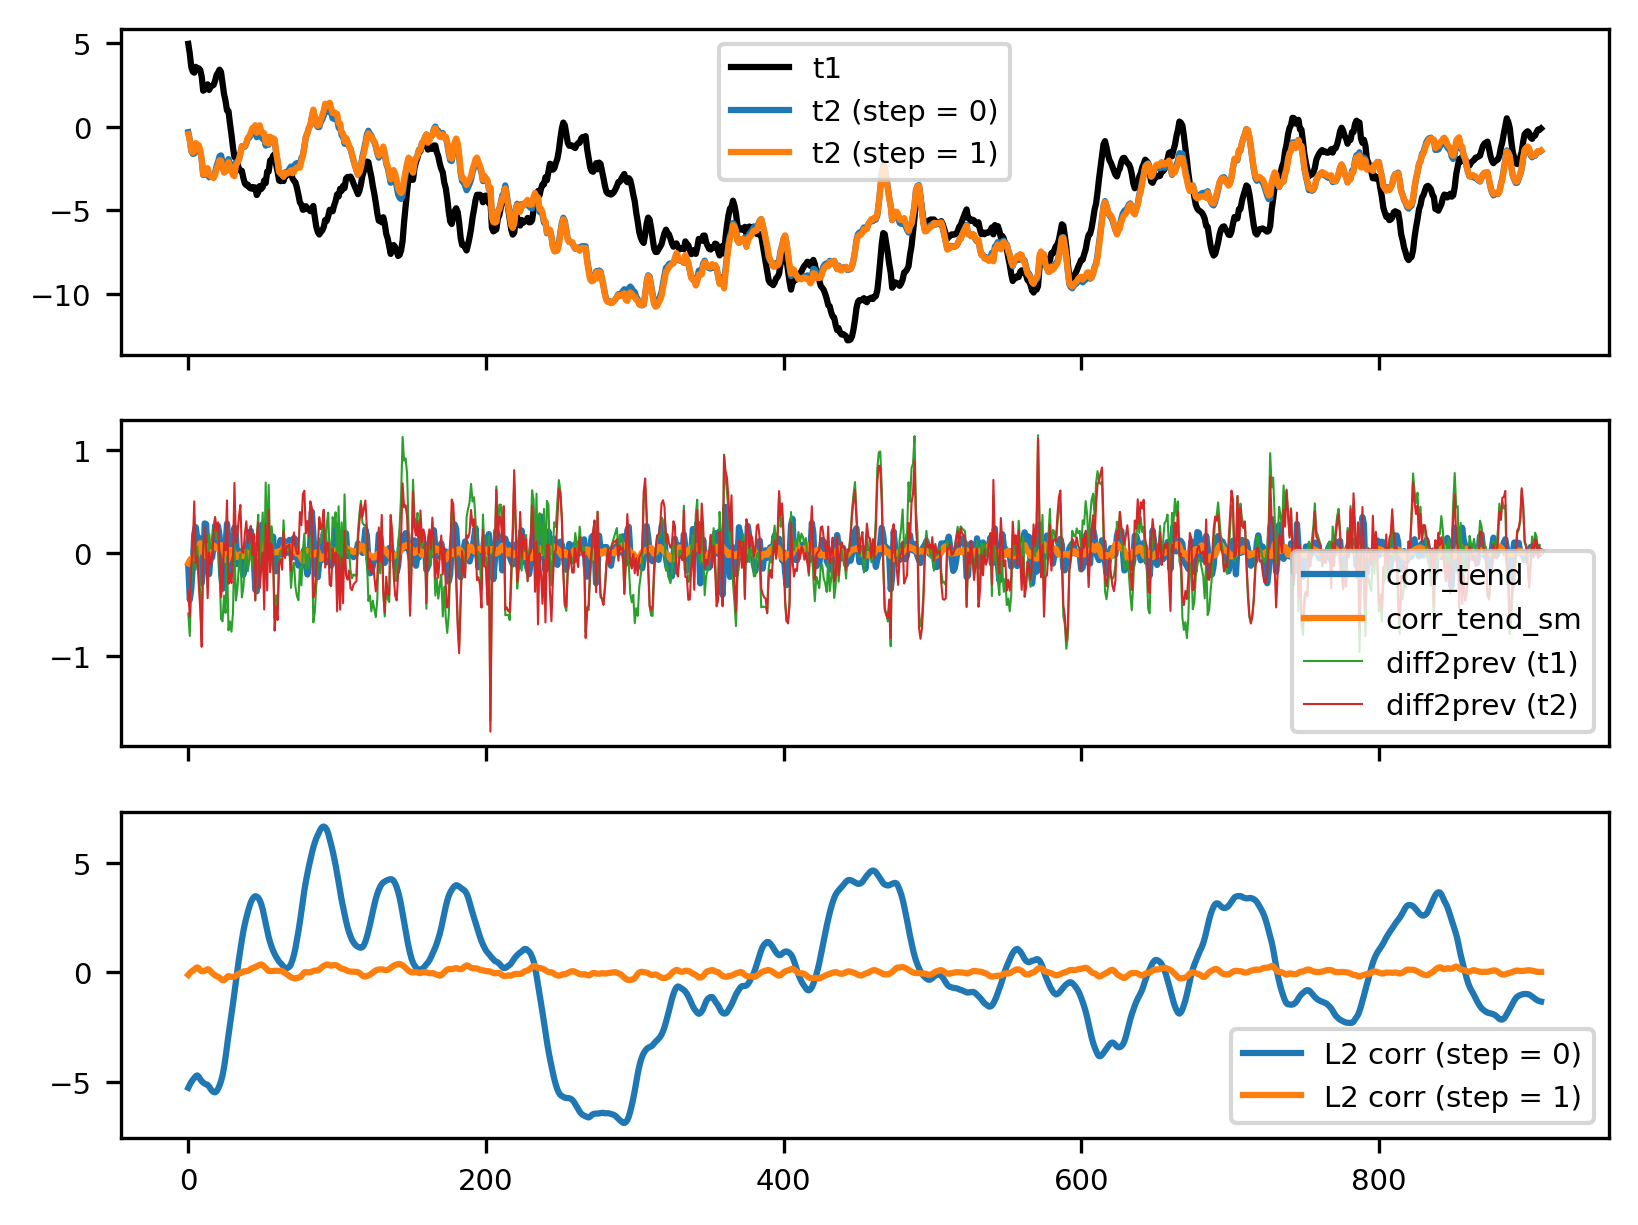

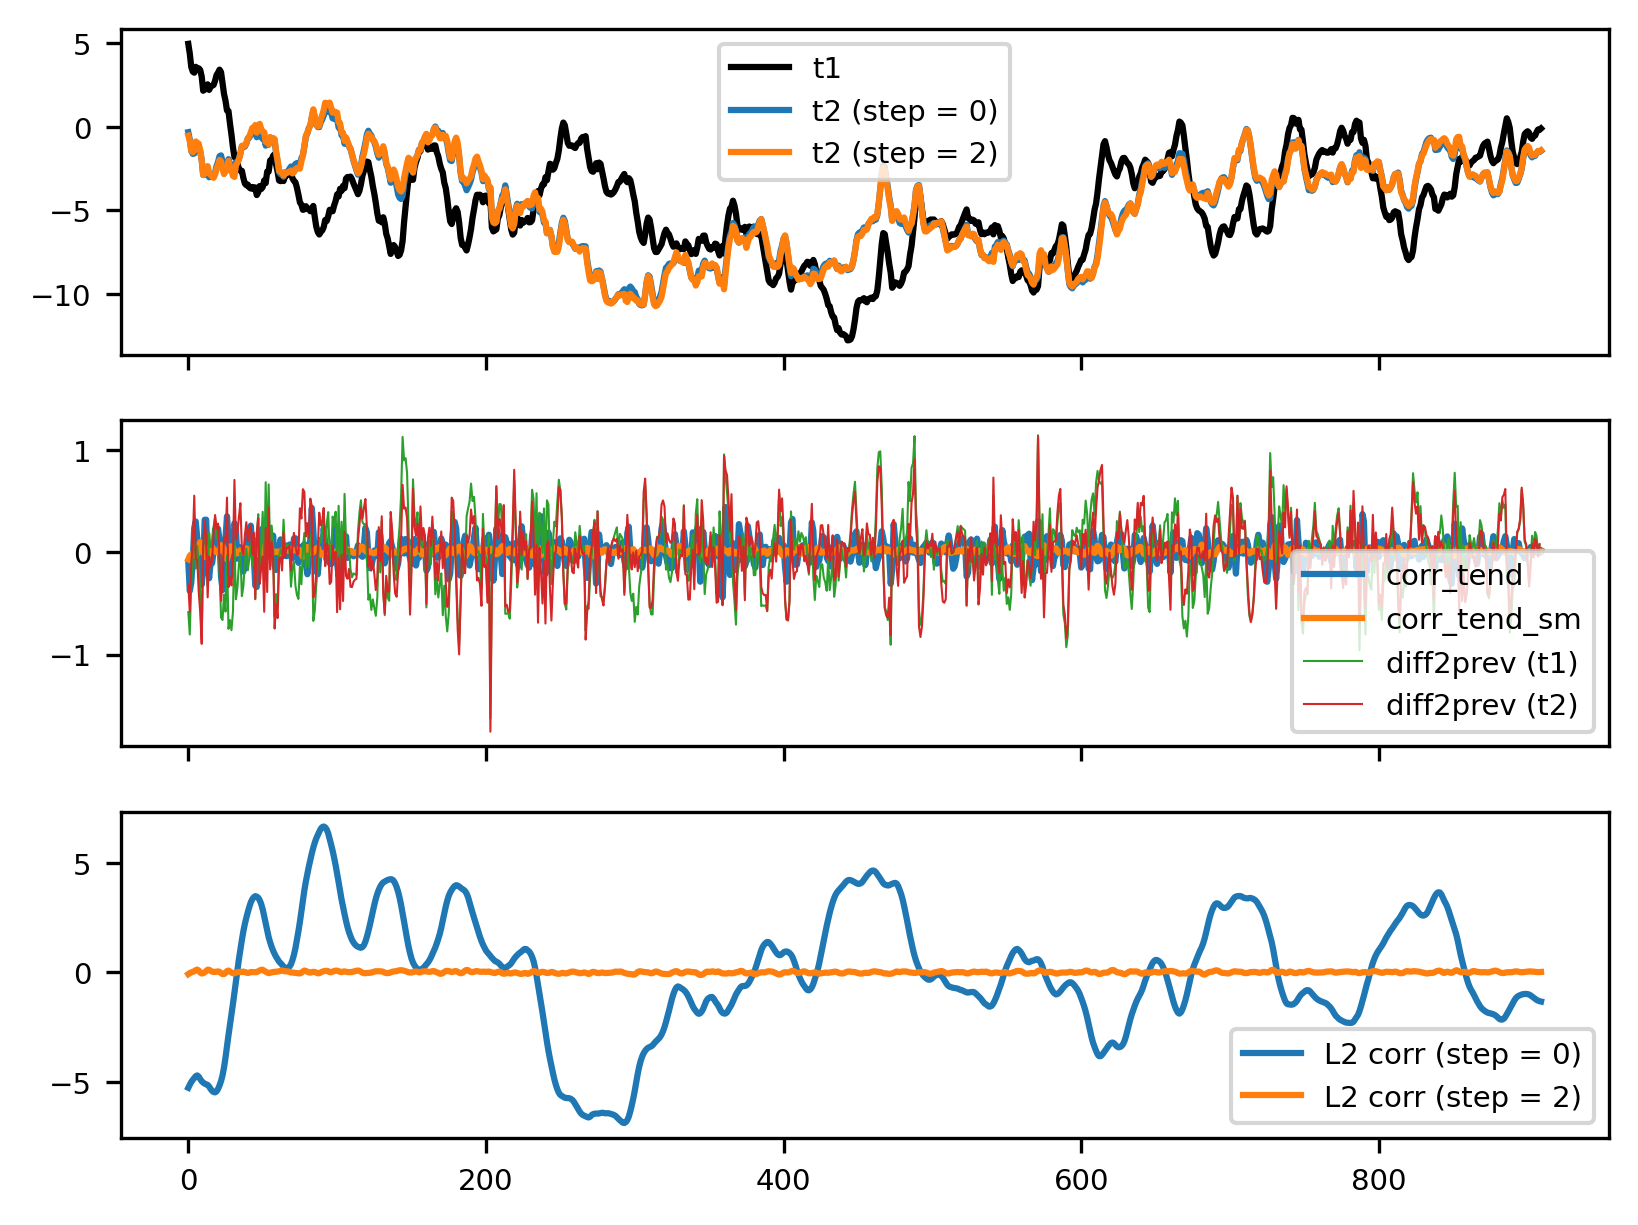

In [56]:
img_array['t2'], diff_matrix['t2'] = IR_processing_utils.run_L2_corr (img_array['t1'], diff_matrix['t1'],
                                                                      corr_opts['detrend'], corr_opts['L2_nsteps'], corr_opts['L2_wnd'], pics_dir = save_dir)


100%|██████████| 910/910 [00:00<00:00, 3262.91it/s]


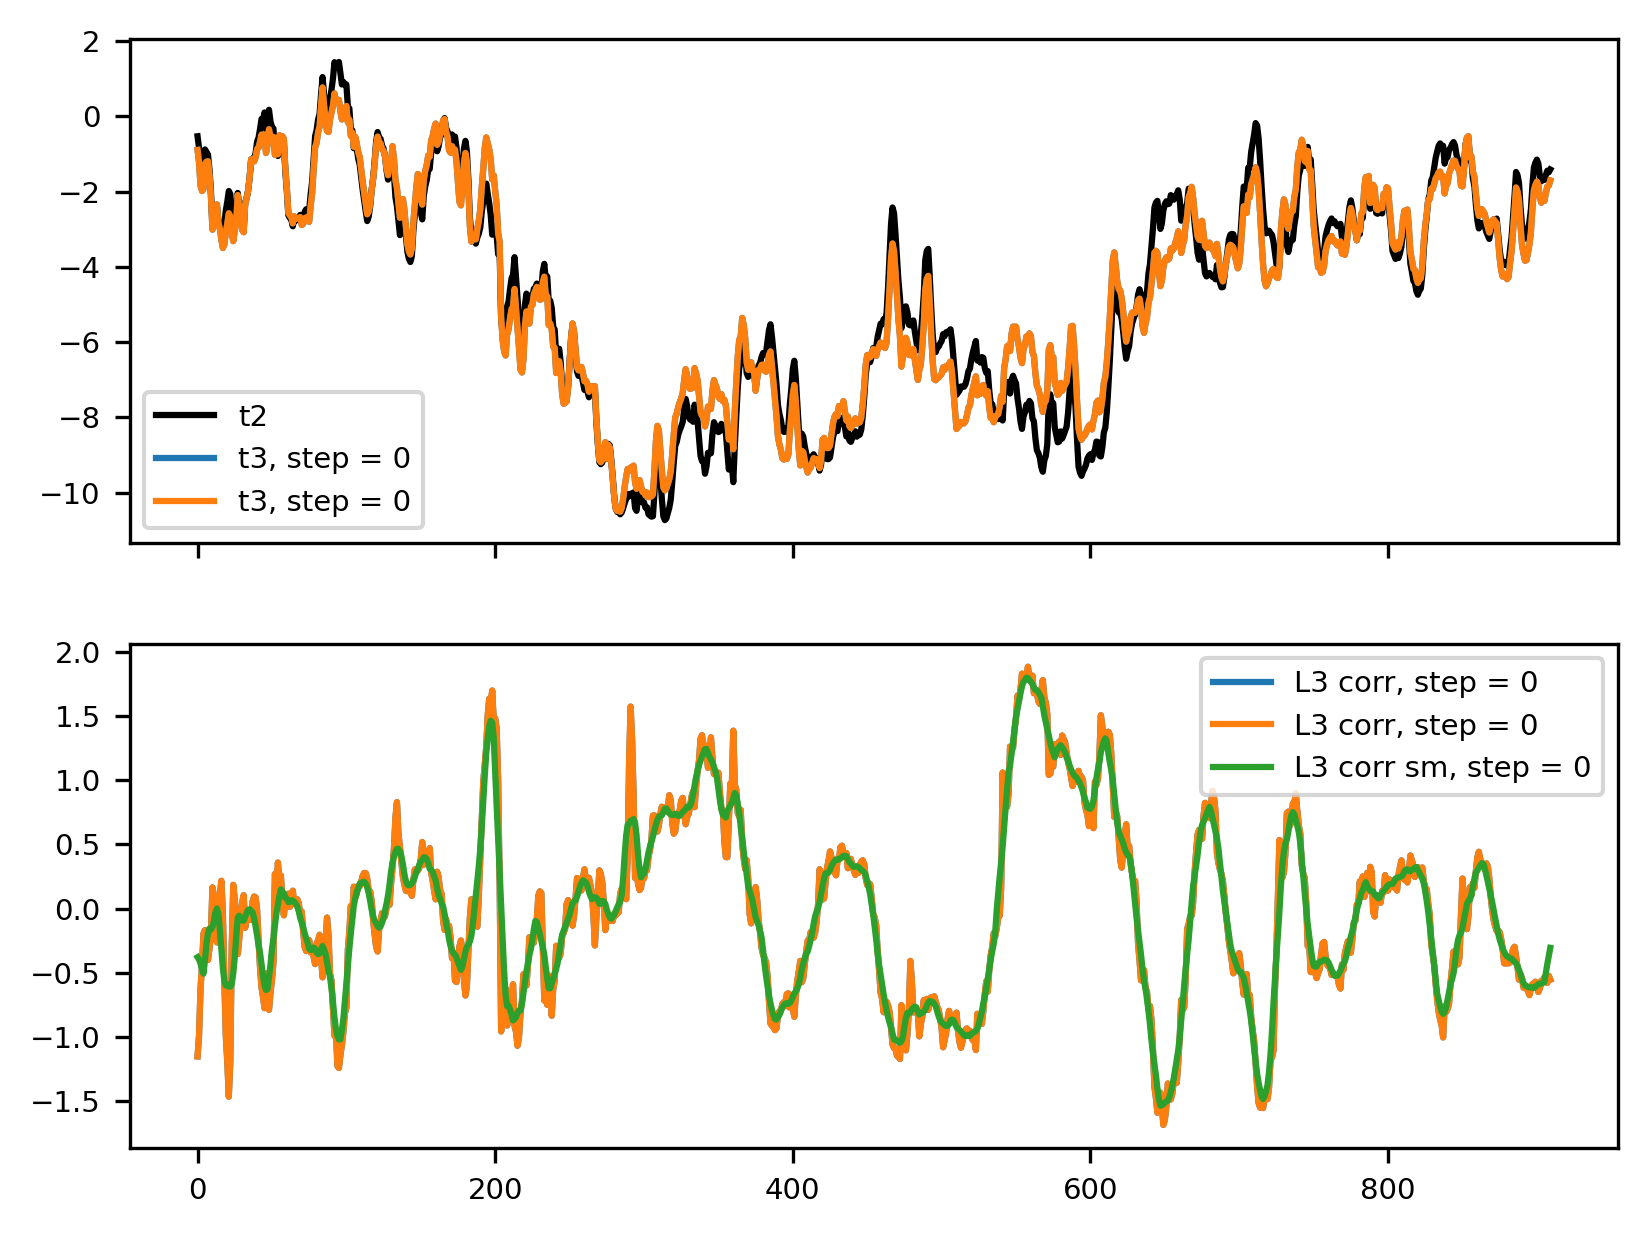

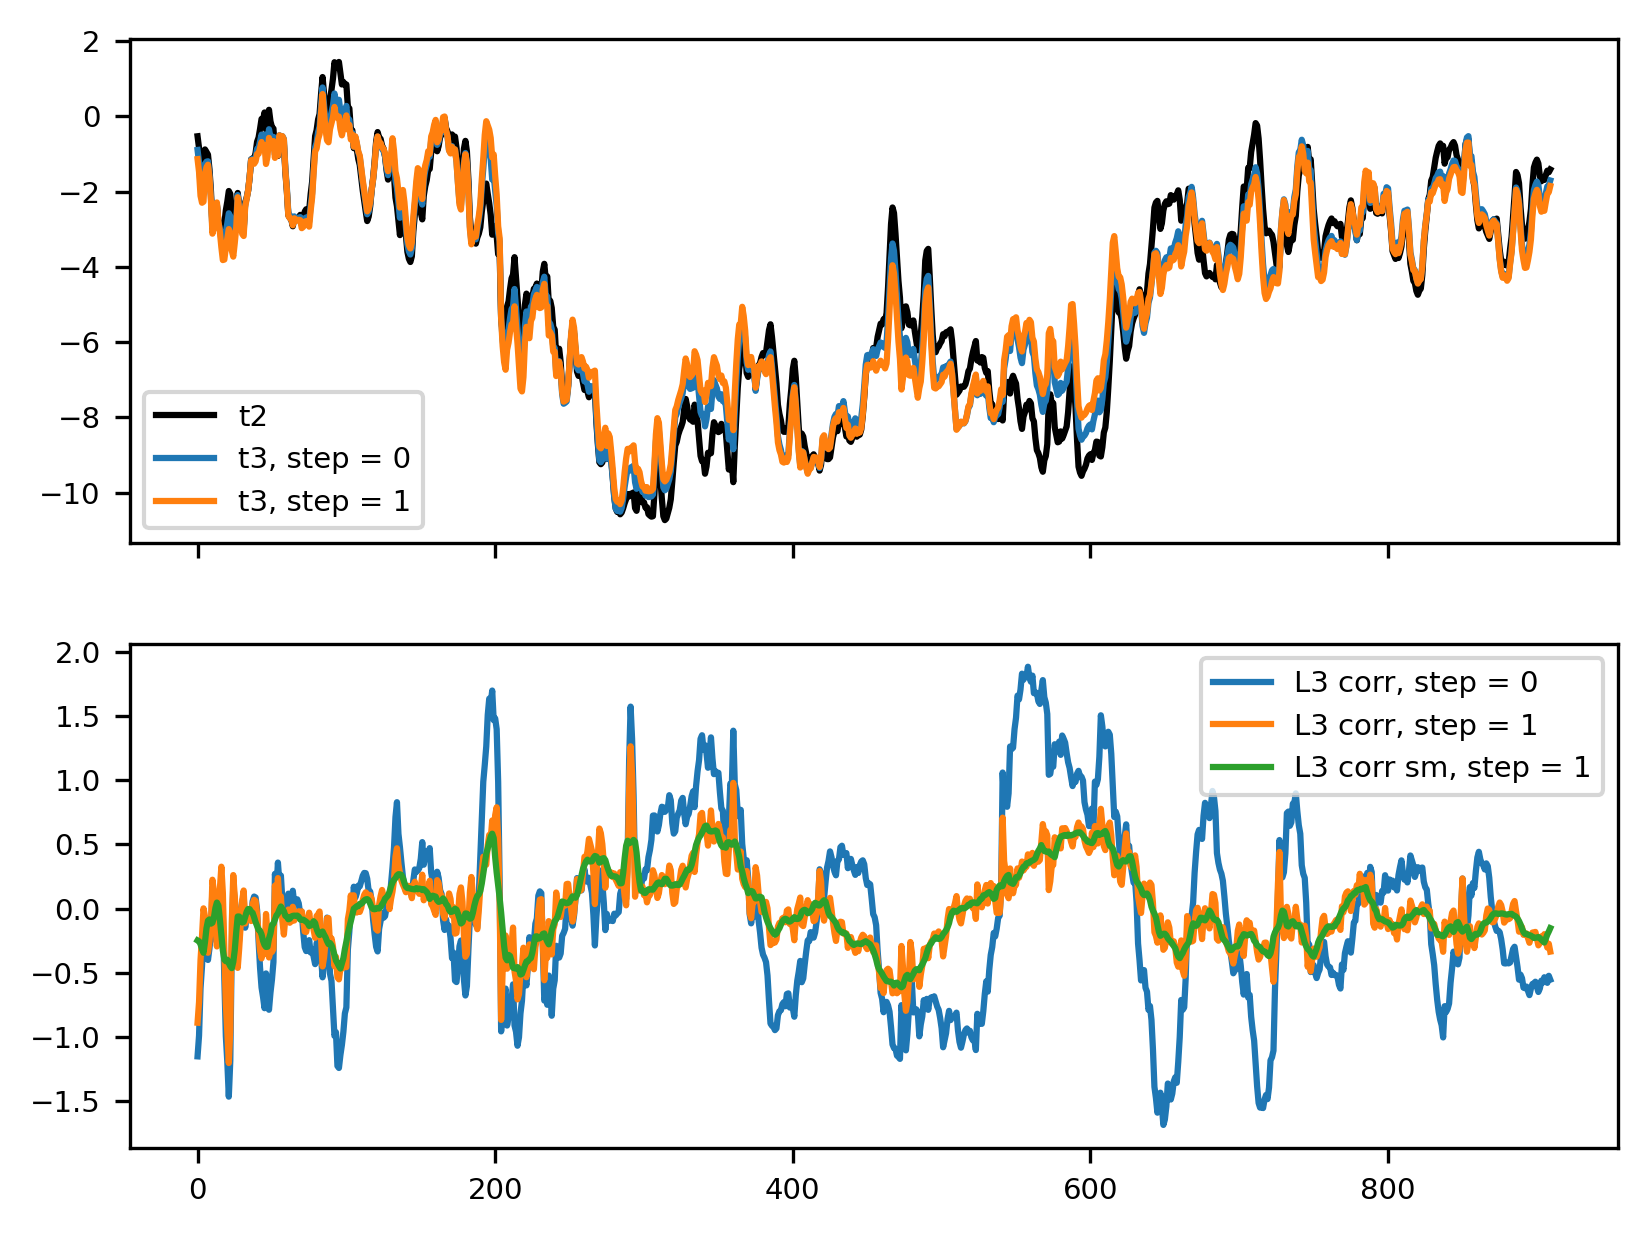

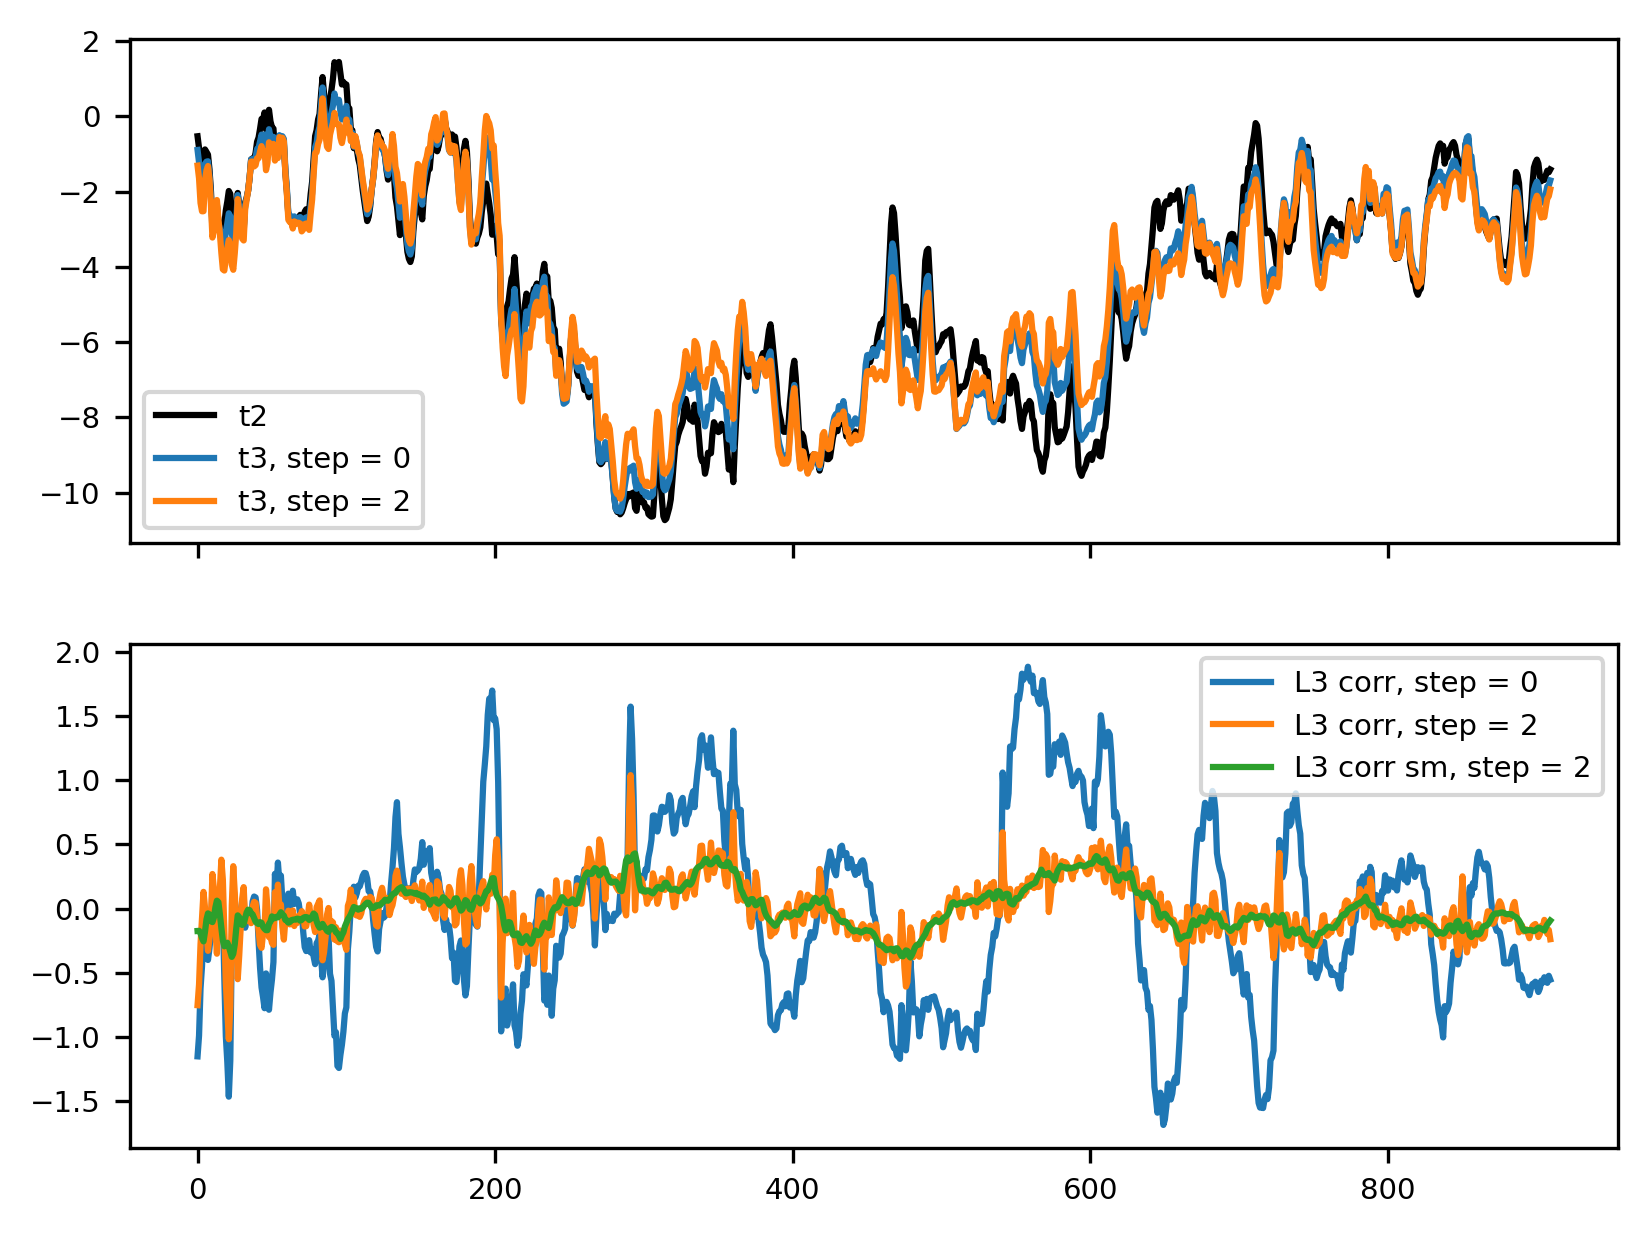

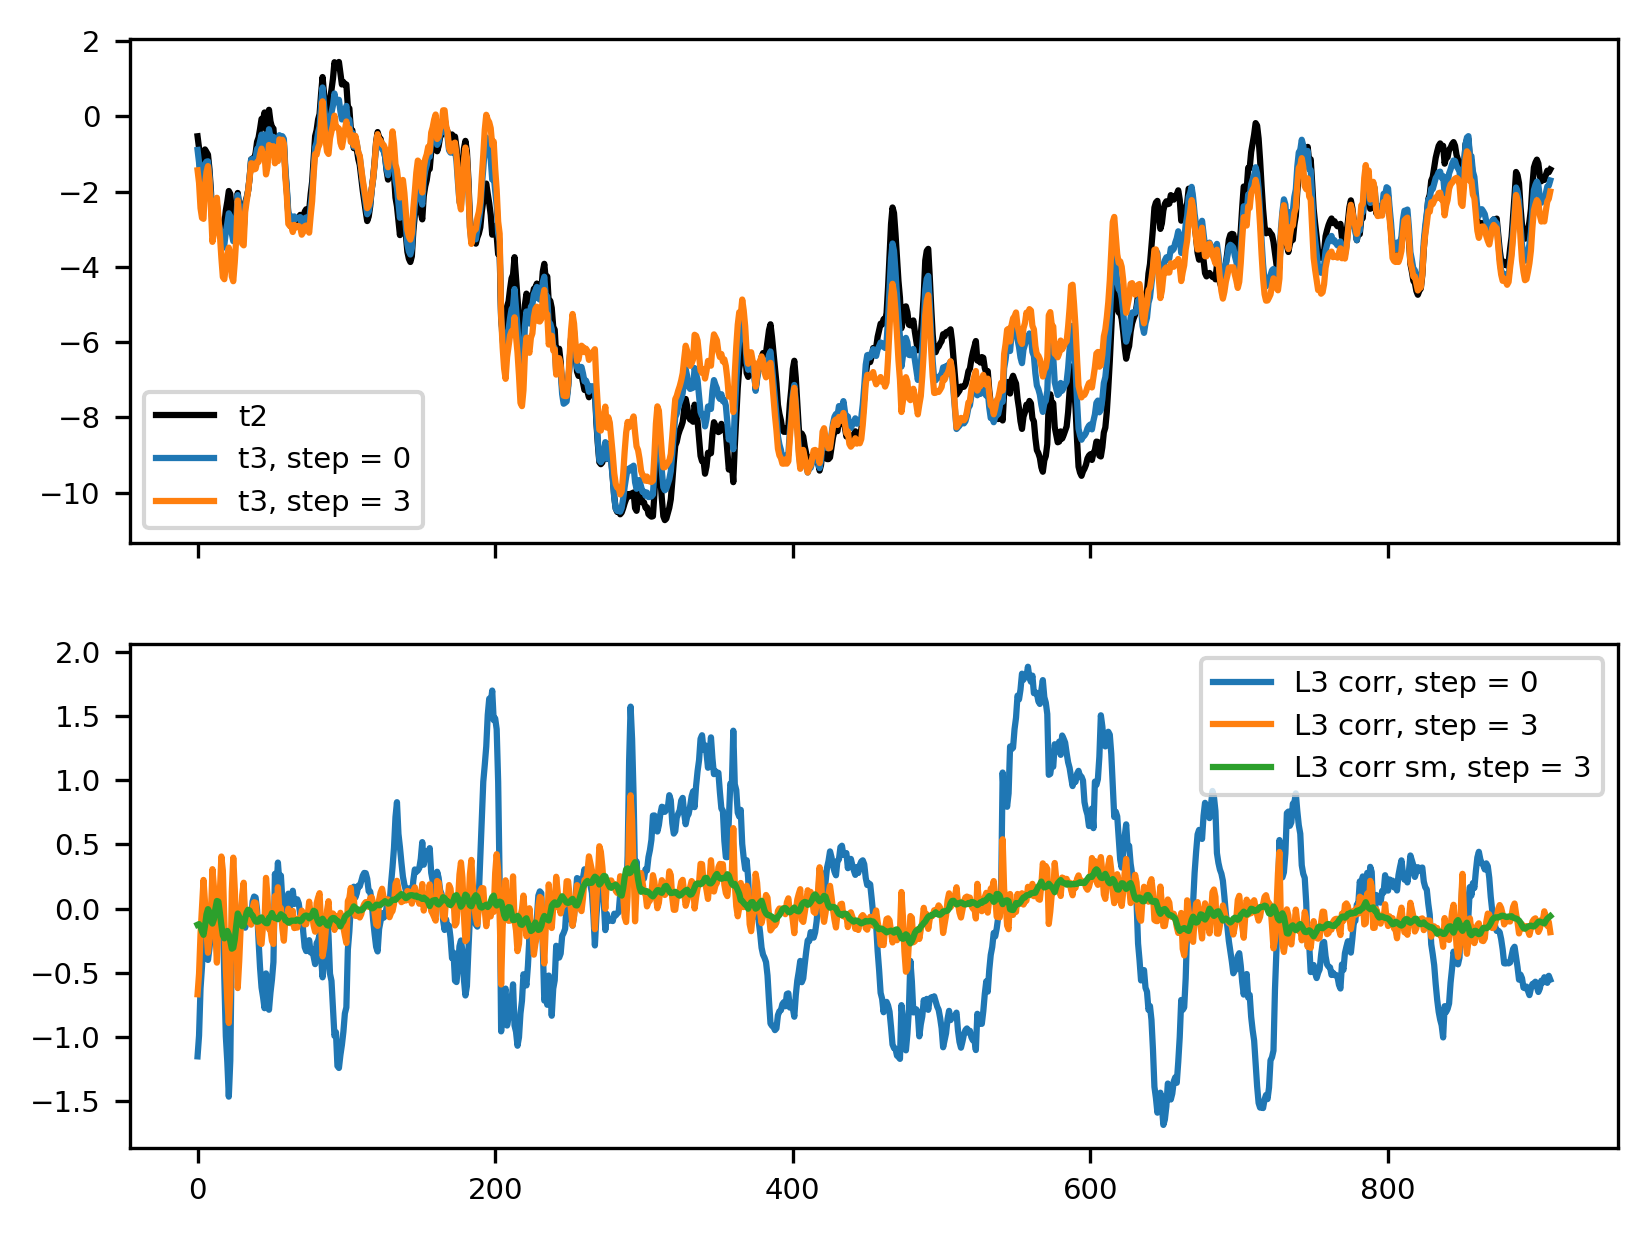

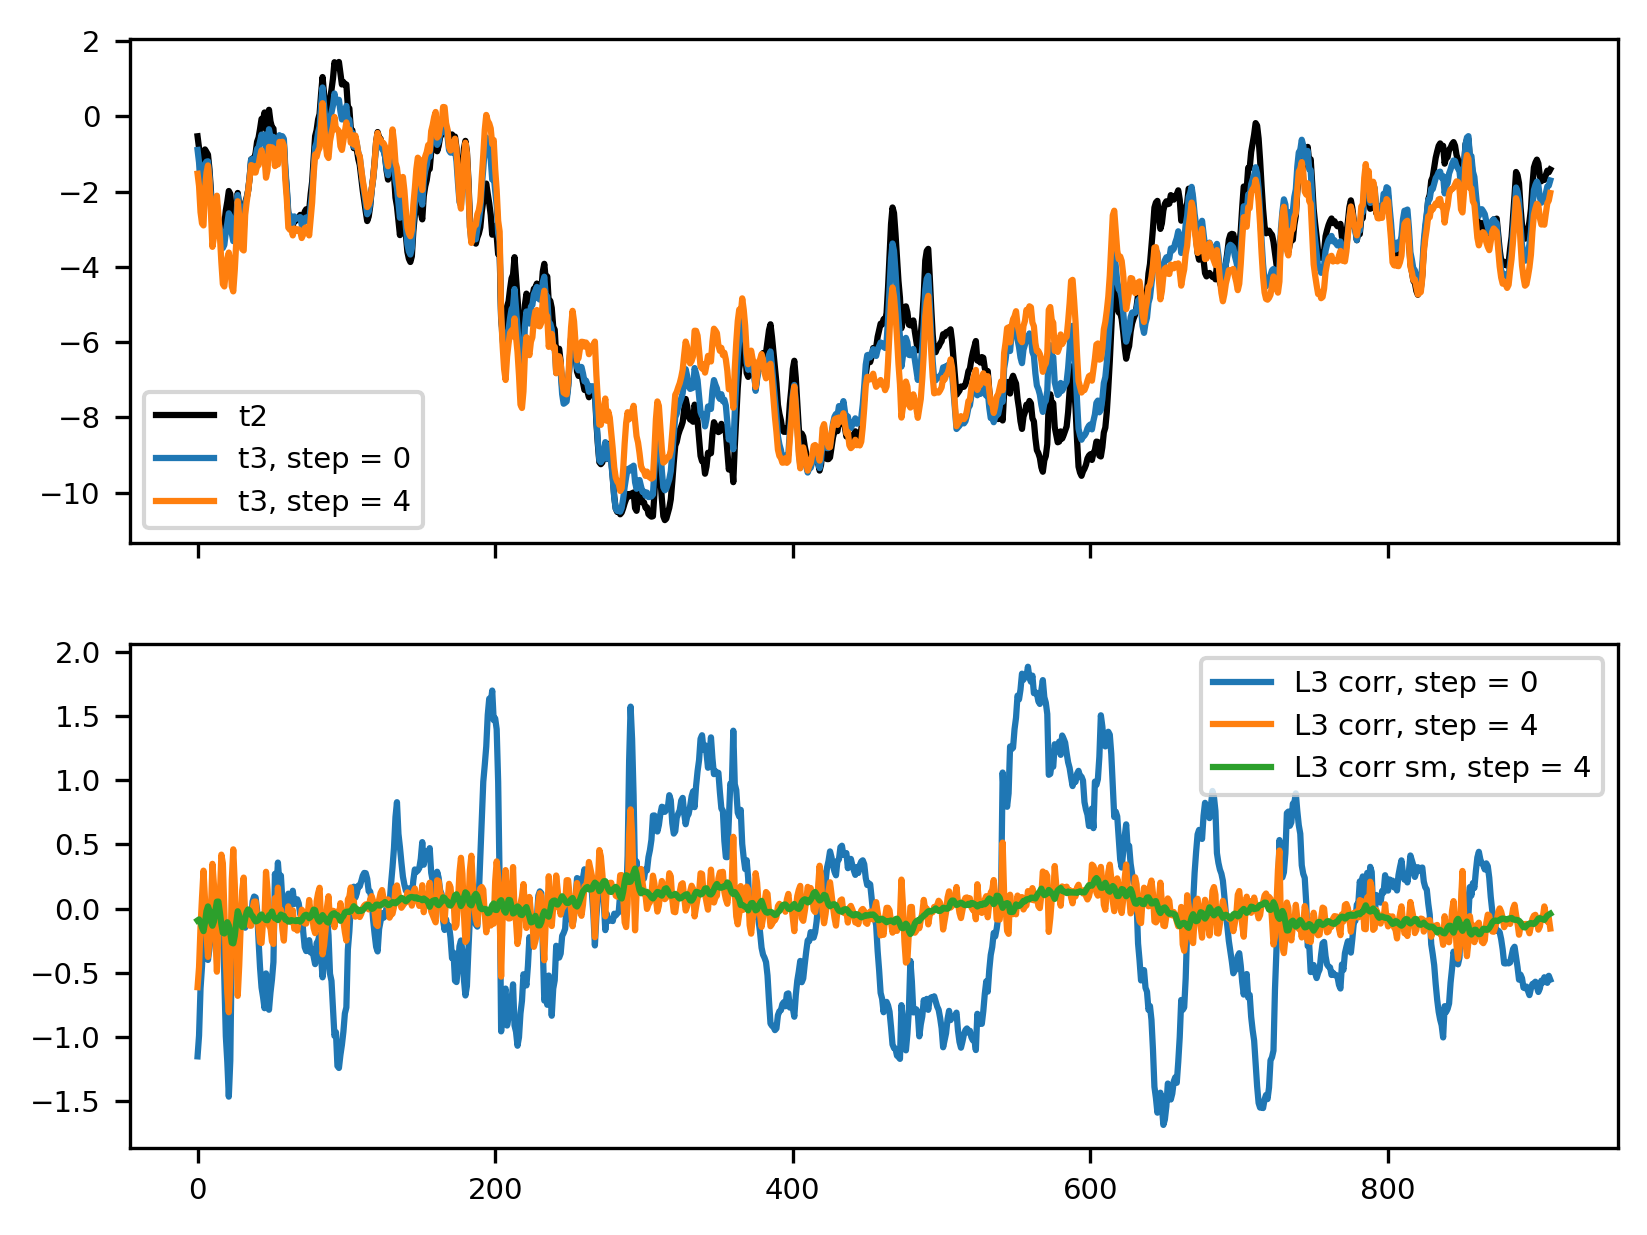

In [62]:
img_array['t3'], diff_matrix['t3'] = IR_processing_utils.run_L3_corr (img_array['t2'], img_df, diff_matrix['t2'], diff_weights,
                                                  corr_opts['detrend'], corr_opts['L3_nsteps'], corr_opts['L3_wnd'], pics_dir = save_dir)



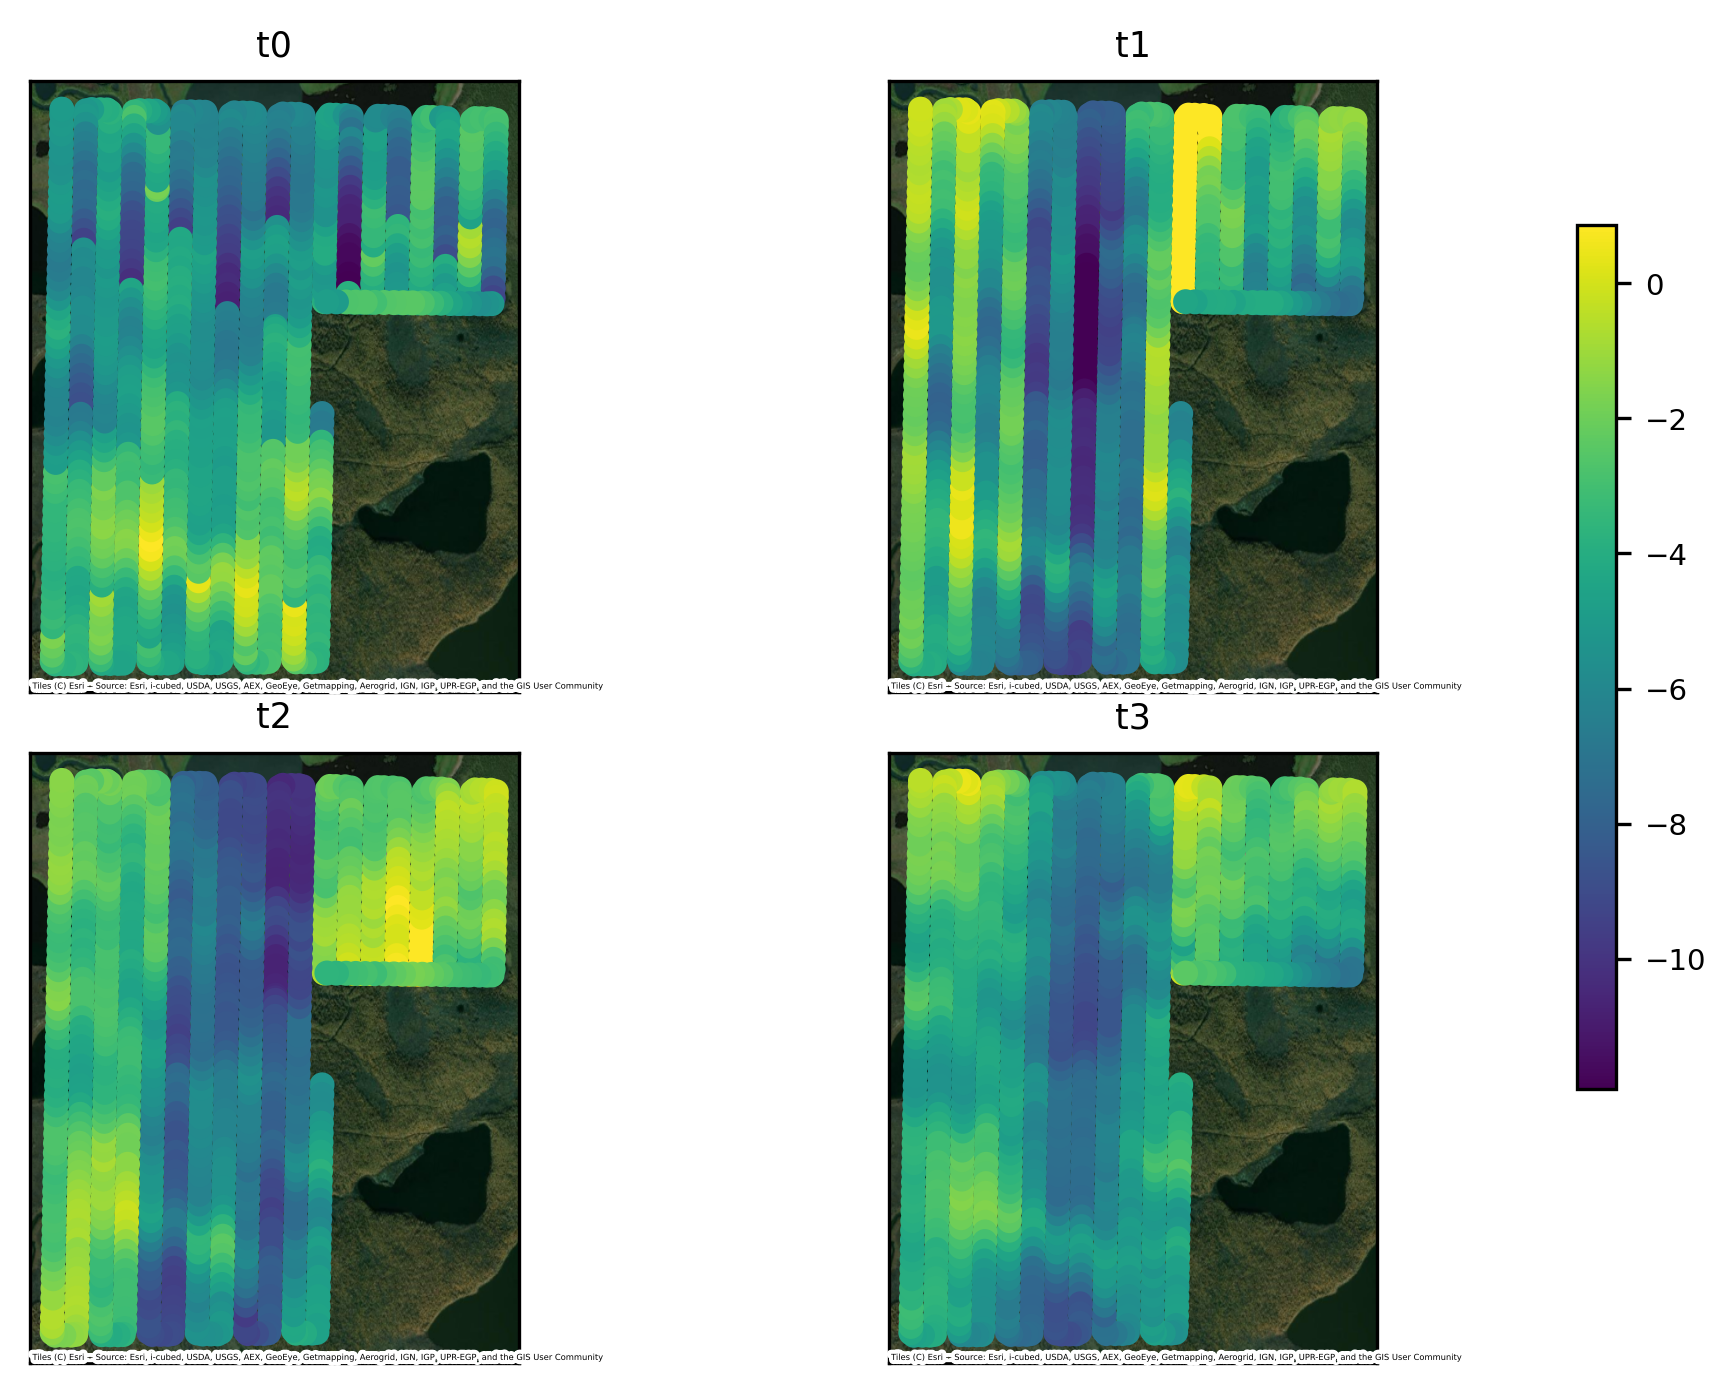

In [61]:

mean_t0 = np.mean(np.mean(img_array['raw'], axis=0), axis=0)
mean_t1 = np.mean(np.mean(img_array['t1'], axis=0), axis=0)
mean_t2 = np.mean(np.mean(img_array['t2'], axis=0), axis=0)
mean_t3 = np.mean(np.mean(img_array['t2'], axis=0), axis=0)


fig, ax = plt.subplots(2,2) #, figsize=(10,5))
ax = ax.flatten()


im = ax[0].scatter(img_df['gps_lon'], img_df['gps_lat'], 25, mean_t0, vmin = mean_t0.min(), vmax = mean_t0.max())
ax[1].scatter(img_df['gps_lon'], img_df['gps_lat'], 25, mean_t1, vmin = mean_t0.min(), vmax = mean_t0.max())
ax[2].scatter(img_df['gps_lon'], img_df['gps_lat'], 25, mean_t2, vmin = mean_t0.min(), vmax = mean_t0.max())
ax[3].scatter(img_df['gps_lon'], img_df['gps_lat'], 25, mean_t3, vmin = mean_t0.min(), vmax = mean_t0.max())


for i, a in enumerate (ax):
    cx.add_basemap(a, source = cx.providers.Esri.WorldImagery, crs = 4326, attribution_size = 2)    
    a.set_xticks([])
    a.set_yticks([])
    a.set_aspect(1.0/np.cos(img_df['gps_lat'].mean()*np.pi/180))
    a.set_title ('t' + str(i))

plt.subplots_adjust(left=0.01, bottom=0.01, right=0.9, top=0.9, wspace=0.01, hspace=0.1)

cbar_ax = fig.add_axes([0.91, 0.2, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax)

plt.savefig(save_dir + 'all_corr, detrend=' + str (corr_opts['detrend']) + '_new2.png')



In [59]:
for key in img_array.keys():
    if key == 'raw':
        continue
    if key != 't3':
        continue

    if data_subdir is None:
        out_dir = data_dir + '\\' + key + 'dt' if corr_opts['detrend'] else 'nodt'
    else:
        out_dir = data_dir + '\\' + data_subdir + ', ' + key + 'dt' if corr_opts['detrend'] else 'nodt'

    if not os.path.isdir(out_dir):
        os.mkdir(out_dir)

    IR_processing_utils.write_IR_images (img_array[key], img_df, out_dir, data_dir_src, n_jobs = 8)

sys.exit()

100%|██████████| 910/910 [03:44<00:00,  4.06it/s]


SystemExit: 

c:\Anaconda\envs\GIS\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
save_dir = pics_dir + '/corr/'
if not os.path.isdir (save_dir):
    os.mkdir (save_dir)

mean_t0 = np.mean(np.mean(img_array['raw'], axis=0), axis=0)

for step in range (0, 50):

    src_key = 'raw' if step == 0 else 't4'

    L4_corr = np.zeros_like(img_df['gps_lon'])

    for i in tqdm (range (0, img_df.shape[0])):

        diff_line = diff_matrix[src_key][i, :]
        weight_line = diff_weights[i, :]

        ind2sel = np.where(~np.isnan(diff_line))[0]

        #L3_corr[i] = -np.mean(diff_line[ind2sel_az])/2
        L4_corr[i] = -0.25 * np.sum(diff_line[ind2sel] * weight_line[ind2sel]) / np.sum(weight_line[ind2sel])

    img_array['t4'] = IR_processing_utils.apply_corr2array(img_array[src_key], L4_corr)
    diff_matrix['t4'] =  IR_processing_utils.apply_corr2diff_matrix(diff_matrix[src_key], L4_corr)

    if np.mod (step, 10) == 0:
        tend2prev = np.array([diff_matrix['t4'][i, i-1] if i > 0 else 0 for i in range (0, img_N)])
        mean_t4 = np.mean(np.mean(img_array['t4'], axis=0), axis=0)

        
        fig, ax = plt.subplots(2,2, figsize = (10, 5))

        ax = ax.flatten()
        ax[0].scatter(img_df['gps_lon'], img_df['gps_lat'], 25, mean_t4)


        cx.add_basemap(ax[0], source = cx.providers.Esri.WorldImagery, crs = 4326, attribution_size = 2)    
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_aspect(1.0/np.cos(img_df['gps_lat'].mean()*np.pi/180))
        
        ax[1].plot(mean_t0)
        ax[1].plot(mean_t4)

        ax[3].plot (tend2prev)
        
        plt.savefig(save_dir + 'L4_corr, detrend=' + str (corr_opts['detrend']) + '_step' + str(step) + '.png')
    #break



